# Phenomenological model constraining: application

![image.png](../slides/jetset_slides/jetset_slides.025.png)


In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [2]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.2.0rc6


In [3]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[2])


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv


In [4]:
%matplotlib inline
from jetset.cosmo_tools import Cosmo
c=Cosmo()
sed_data=ObsData(data_table=data,cosmo=c)
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.2,[10.**6,10.**29])



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



In [5]:
sed_data.save('Mrk_501.pkl')

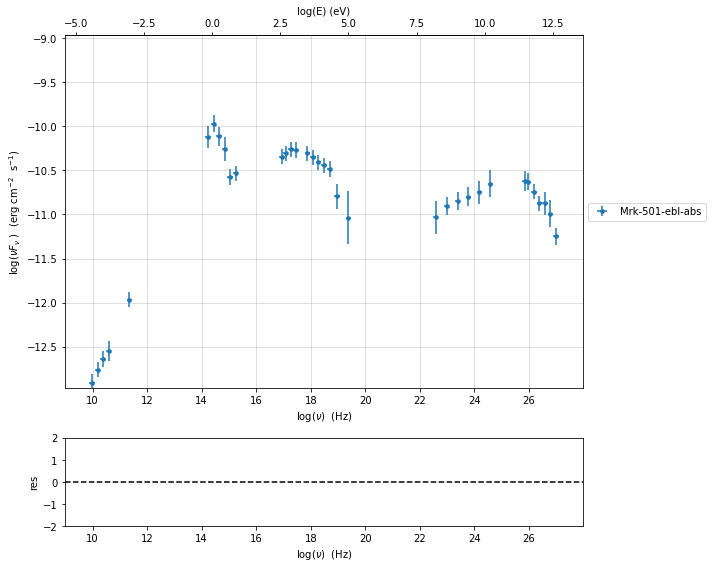

In [6]:
p=sed_data.plot_sed()


*** evaluating spectral indices for data ***



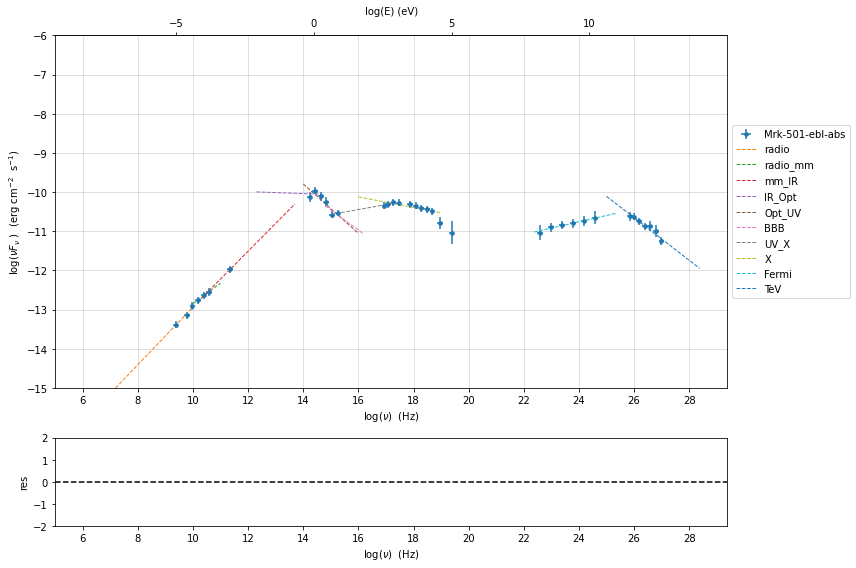

In [7]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices()
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

In [13]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='minuit',
                  silent=True,
                  fit_range=[10,21])

try:
    x,y,z,fig,ax=mm.minimizer.draw_contour('Ep','b')
except:
    pass

try:
    x,y,fig,ax=mm.minimizer.draw_profile('Ep')
except:
    pass



*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP




model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-7.140660e-02,-7.140660e-02,1.337839e-02,--,-5.480219e-02,-1.000000e+01,0.000000e+00,False
LogCubic,c,-2.625704e-03,-2.625704e-03,2.018418e-03,--,3.829925e-03,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,1.694995e+01,1.694995e+01,1.504736e-01,--,1.603681e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.028879e+01,-1.028879e+01,3.653042e-02,--,-1.021025e+01,-3.000000e+01,0.000000e+00,False
host_galaxy,nuFnu_p_host,-1.007416e+01,-1.007416e+01,8.084766e-02,--,-1.021025e+01,-1.221025e+01,-8.210253e+00,False
host_galaxy,nu_scale,-1.538032e-02,-1.538032e-02,3.055112e-05,--,0.000000e+00,-5.000000e-01,5.000000e-01,False


---> sync       nu_p=+1.694995e+01 (err=+1.504736e-01)  nuFnu_p=-1.028879e+01 (err=+3.653042e-02) curv.=-7.140660e-02 (err=+1.337839e-02)



RuntimeWarning: Fit quality not sufficient to run draw_contour

In [10]:
help(mm.minimizer.minos_errors)

Help on method minos_errors in module jetset.minimizer:

minos_errors(par=None) method of jetset.minimizer.MinutiMinimizer instance



In [ ]:
my_shape.IC_fit(fit_range=[21,29],minimizer='lsb')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15,x_min=7,x_max=29)

In [ ]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=15,
                        B_range=[0.01,0.1],
                        distr_e='lppl',
                        t_var_sec=1*86400,
                        nu_cut_IR=5E10,
                        SEDShape=my_shape)


jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=True,silent=False)

In [ ]:
pl=jet.plot_model(sed_data=sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)
jet.save_model('constrained_jet.pkl')